In [1]:
from LSTM import SensorLSTM
from LSTM import RegressionLSTM
from SensorDataset import SensorDataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import seaborn as sn
import pandas as pd
%matplotlib inline

Using TensorFlow backend.


In [2]:
dt = SensorDataset("/Users/rafaelpossas/Dev/multimodal/sensor")
lstm = SensorLSTM()
regression = RegressionLSTM()
scaler = MinMaxScaler()

In [3]:
sensor_columns = [['accx', 'accy', 'accz'],
                  ['grax', 'gray', 'graz'],
                  ['gyrx', 'gyry', 'gyrz'],
                  ['lacx', 'lacy', 'lacz'],
                  ['magx', 'magy', 'magz'],
                  ['rotx', 'roty', 'rotz', 'rote']]

targets = ['walking', 'walking upstairs', 'walking downstairs', 'rid.elevator up',
                    'rid.elevator down', 'rid.escalator up', 'rid.escalator down', 'sitting',
                    'eating', 'drinking', 'texting', 'mak.phone calls',
                    'working at PC', 'reading', 'writting sentences', 'organizing files',
                    'running', 'doing push-ups', 'doing sit-ups', 'cycling']

sensor = ['accx','accy','accz']
grd = ['rmsprop','64','75','0.4']

In [4]:
dt.load_dataset(selected_sensors=sensor,
                group_size=int(grd[2]), step_size=int(grd[2]), train_size=0.7)

model = lstm.get_model(input_shape=(dt.x_train.shape[1], dt.x_train.shape[2]),
                       output_shape=dt.y_train.shape[1], layer_size=int(grd[1]),
                       optimizer=grd[0], dropout=float(grd[3]))

model.load_weights("models/65.00_accx_accy_accz_rmsprop_64_75_0.4.hdf5")

#Scores
#y_pred = model.predict_classes(dt.)
scores = model.evaluate(dt.x_test, dt.y_test, verbose=0)
acc = (scores[1] * 100)
#print("Accuracy: %.2f%%" % acc)

y_pred = model.predict_classes(dt.x_test)

Train (280, 75, 3).(280, 20)
Test (120, 75, 3).(120, 20)
120/120 [==============================] - 0s     


In [5]:
rp = classification_report(np.argmax(dt.y_test, axis=1), y_pred, target_names=targets)
cm = confusion_matrix(np.argmax(dt.y_test, axis=1), y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

/usr/local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [6]:
df_cm = pd.DataFrame(cm, index=targets, columns=targets)

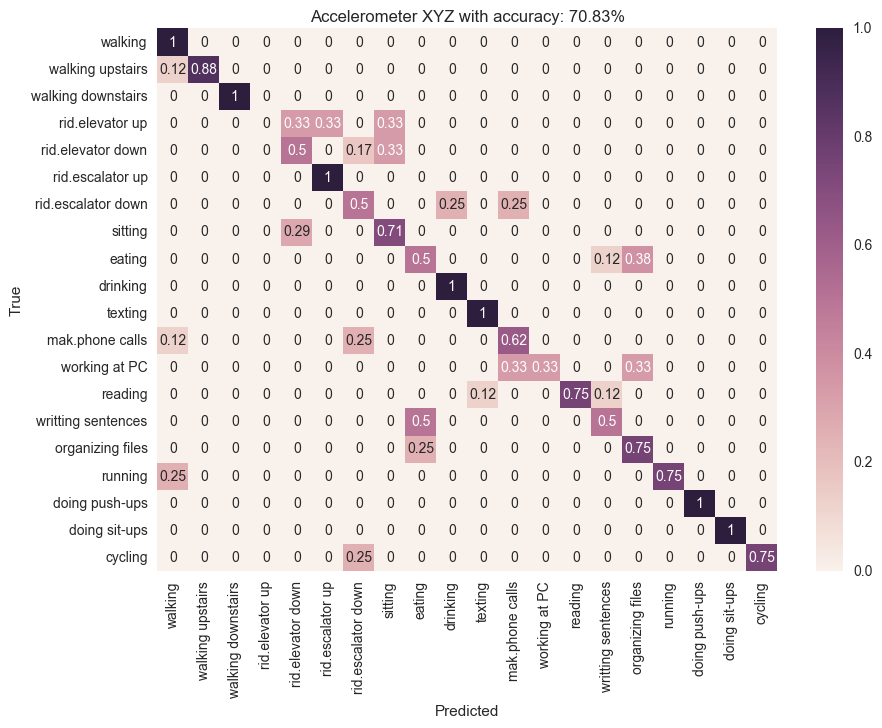

In [7]:
plt.figure(figsize =(10,7))

hm = sn.heatmap(df_cm, annot=True)
hm.axes.set_title('Accelerometer XYZ with accuracy: %.2f%%' % acc)
hm.axes.set_xlabel("Predicted")
hm.axes.set_ylabel("True")

Train (140, 150, 1).(140, 20)
Test (60, 150, 1).(60, 20)
Epoch 1/50
5s - loss: 0.0148
Epoch 2/50
5s - loss: 0.0022
Epoch 3/50
4s - loss: 0.0021
Epoch 4/50
5s - loss: 0.0021
Epoch 5/50
5s - loss: 0.0021
Epoch 6/50
5s - loss: 0.0021
Epoch 7/50
5s - loss: 0.0021
Epoch 8/50
5s - loss: 0.0021
Epoch 9/50
5s - loss: 0.0021
Epoch 10/50
5s - loss: 0.0021
Epoch 11/50
5s - loss: 0.0021
Epoch 12/50
5s - loss: 0.0021
Epoch 13/50
5s - loss: 0.0021
Epoch 14/50
5s - loss: 0.0021
Epoch 15/50
5s - loss: 0.0021
Epoch 16/50
5s - loss: 0.0021
Epoch 17/50
5s - loss: 0.0021
Epoch 18/50
5s - loss: 0.0021
Epoch 19/50
5s - loss: 0.0021
Epoch 20/50
5s - loss: 0.0021
Epoch 21/50
5s - loss: 0.0021
Epoch 22/50
5s - loss: 0.0021
Epoch 23/50
5s - loss: 0.0021
Epoch 24/50
5s - loss: 0.0021
Epoch 25/50
5s - loss: 0.0021
Epoch 26/50
5s - loss: 0.0021
Epoch 27/50
5s - loss: 0.0021
Epoch 28/50
5s - loss: 0.0021
Epoch 29/50
5s - loss: 0.0021
Epoch 30/50
5s - loss: 0.0021
Epoch 31/50
5s - loss: 0.0021
Epoch 32/50
5s - loss:

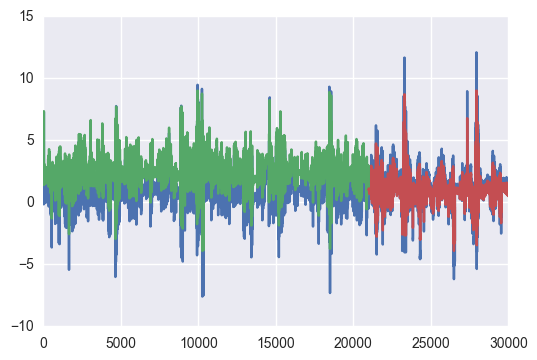

In [5]:
dt.load_dataset(train_size=0.7, split_train=True,group_size=150,step_size=150,selected_sensors=['accx'])
regression.predict_timeseries(dt,50, 20)